In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# # make sure to install these packages before running:
# %pip install pandas
# %pip install sodapy

# Authentication

In [3]:
#!/usr/bin/env python
import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", "HFj3sB1Cwcw5QHqdifNVQz9J1")

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# Data
---

### DHS Daily Report
Source: https://data.cityofnewyork.us/Social-Services/DHS-Daily-Report/k46n-sa2m

This dataset includes the daily number of families and individuals residing in the Department of Homeless Services (DHS) shelter system and the daily number of families applying to the DHS shelter system.

In [11]:
meta_data_1 = pd.read_excel('./homeless/DHSDailyReport.xlsx', sheet_name=1, header=1)
meta_data_1.iloc[:,[1,2,3]];

In [12]:
# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("k46n-sa2m", limit = 10_000);

# Convert to pandas DataFrame
daily_dhs_df = pd.DataFrame.from_records(results);

In [24]:
test = daily_dhs_df.iloc[:10,:].copy()

In [25]:
test['Total_test'] = test['total_adults_in_shelter'] + test['total_children_in_shelter']

In [26]:
test.head()

,date_of_census,total_adults_in_shelter,total_children_in_shelter,total_individuals_in_shelter,single_adult_men_in_shelter,single_adult_women_in_shelter,total_single_adults_in_shelter,families_with_children_in_shelter,adults_in_families_with_children_in_shelter,children_in_families_with_children_in_shelter,total_individuals_in_families_with_children_in_shelter_,adult_families_in_shelter,individuals_in_adult_families_in_shelter,Total_test
0,2019-11-13T00:00:00.000,38612,21876,60488,12236,4626,16862,12255,16414,21876,38290,2533,5336,3861221876
1,2019-11-12T00:00:00.000,38600,21879,60479,12210,4633,16843,12260,16419,21879,38298,2534,5338,3860021879
2,2019-11-11T00:00:00.000,38475,21867,60342,12140,4609,16749,12259,16417,21867,38284,2521,5309,3847521867
3,2019-11-10T00:00:00.000,38368,21860,60228,12112,4576,16688,12242,16387,21860,38247,2513,5293,3836821860
4,2019-11-09T00:00:00.000,38293,21803,60096,12070,4582,16652,12209,16341,21803,38144,2516,5300,3829321803


In [27]:
test[['Total_test', 'total_individuals_in_shelter']]

,Total_test,total_individuals_in_shelter
0,3861221876,60488
1,3860021879,60479
2,3847521867,60342
3,3836821860,60228
4,3829321803,60096
5,3828121794,60075
6,3833521835,60170
7,3831221809,60121
8,3823321750,59983
9,3822121730,59951


### Local Law 37 - DHS Report

Source : https://data.cityofnewyork.us/Social-Services/Local-Law-37-DHS-Report/2mqz-v5im

The DHS Local Law 37 report provides aggregate information on individuals and families that utilize DHS services including data on length of stay and shelter applications.

In [62]:
results = client.get("2mqz-v5im", limit = 10_000)
monthly_dhs_df = pd.DataFrame.from_records(results)

In [64]:
monthly_dhs_df.isnull().mean()

ll37_report_row_name        0.000000
single_men                  0.418868
single_women                0.418868
total_single_adults         0.426415
families_with_children      0.498113
adult_families              0.494340
total_families              0.898113
data_period                 0.026415
total_adults_in_families    0.932075
total_children              0.932075
dtype: float64

### Average Daily Inmate Population

Source : https://data.cityofnewyork.us/Public-Safety/Average-Daily-Inmate-Population/26ze-s5bx

Average daily inmate population by fiscal year

Note: The data for each of these indicators is based upon year of report, not year of occurrence.

In [65]:
results = client.get("26ze-s5bx", limit = 10_000)
inmate_pop_df = pd.DataFrame.from_records(results)

inmate_pop_df

,fiscal_year,inmate_population
0,2010,13049
1,2009,13362
2,2008,13850
3,2007,13987
4,2006,13497
5,2005,13576
6,2004,13751
7,2003,14533
8,2002,13934
9,2001,14490


### Inmate Arrests

Source : https://data.cityofnewyork.us/Public-Safety/Inmate-Arrests/d4uz-6jaw

Inmate Arrests by fiscal year

In [66]:
results = client.get("d4uz-6jaw", limit = 10_000)
num_arrest_df = pd.DataFrame.from_records(results)

num_arrest_df

,fiscal_year,number_of_arrests
0,2010,526
1,2009,567
2,2008,751
3,2007,738
4,2006,654
5,2005,684
6,2004,628
7,2003,671
8,2002,576
9,2001,853


### NYPD Complaint Data Historic

Source : https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

This dataset includes all valid felony, misdemeanor, and violation crimes reported to the New York City Police Department (NYPD) from 2006 to the end of last year (2017). For additional details, please see the attached data dictionary in the ‘About’ section.

- Is there complaints about homeless people?
- Is that related to homeless shelter pop and application rate?

In [42]:
results = client.get("qgea-i56i", limit = 2000)
nypd_complaint_df = pd.DataFrame.from_records(results)

In [43]:
nypd_complaint_df

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,pd_desc,crm_atpt_cptd_cd,...,:@computed_region_sbqj_enih,cmplnt_to_dt,cmplnt_to_tm,loc_of_occur_desc,susp_race,susp_sex,susp_age_group,transit_district,station_name,hadevelopt
0,876525802,2008-04-10T00:00:00.000,19:10:00,73,2008-04-10T00:00:00.000,341,PETIT LARCENY,321,"LARCENY,PETIT FROM AUTO",COMPLETED,...,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,402693528,2007-06-03T00:00:00.000,15:23:00,28,2007-06-03T00:00:00.000,236,DANGEROUS WEAPONS,782,"WEAPONS, POSSESSION, ETC",COMPLETED,...,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,832030069,2010-02-16T00:00:00.000,20:50:00,102,2010-02-16T00:00:00.000,105,ROBBERY,375,"ROBBERY,PHARMACY",COMPLETED,...,60,2010-02-16T00:00:00.000,20:50:00,INSIDE,NaN,NaN,NaN,NaN,NaN,NaN
3,538308771,2009-11-10T00:00:00.000,16:35:00,79,2009-11-10T00:00:00.000,341,PETIT LARCENY,333,"LARCENY,PETIT FROM STORE-SHOPL",COMPLETED,...,51,2009-11-10T00:00:00.000,16:45:00,INSIDE,NaN,NaN,NaN,NaN,NaN,NaN
4,965693192,2006-04-11T00:00:00.000,09:30:00,123,2006-04-25T00:00:00.000,112,THEFT-FRAUD,739,"FRAUD,UNCLASSIFIED-FELONY",COMPLETED,...,NaN,2006-04-11T00:00:00.000,10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,450282602,2006-04-22T00:00:00.000,11:00:00,70,2006-04-25T00:00:00.000,341,PETIT LARCENY,338,"LARCENY,PETIT FROM BUILDING,UN",COMPLETED,...,NaN,2006-04-23T00:00:00.000,04:00:00,INSIDE,NaN,NaN,NaN,NaN,NaN,NaN
1996,975636164,2010-05-27T00:00:00.000,00:01:00,46,2010-05-27T00:00:00.000,578,HARRASSMENT 2,638,"HARASSMENT,SUBD 3,4,5",COMPLETED,...,29,NaN,NaN,INSIDE,UNKNOWN,M,NaN,NaN,NaN,NaN
1997,470419075,2006-04-05T00:00:00.000,17:40:00,113,2006-04-20T00:00:00.000,109,GRAND LARCENY,438,"LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...",COMPLETED,...,NaN,NaN,NaN,INSIDE,NaN,NaN,NaN,NaN,NaN,NaN
1998,758536923,2006-04-02T00:00:00.000,23:30:00,90,2006-04-03T00:00:00.000,351,CRIMINAL MISCHIEF & RELATED OF,254,"MISCHIEF, CRIMINAL 4, OF MOTOR",COMPLETED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### New York City Population by Borough, 1950 - 2040

Source : https://data.cityofnewyork.us/City-Government/New-York-City-Population-by-Borough-1950-2040/xywu-7bv9

Unadjusted decennial census data from 1950-2000 and projected figures from 2010-2040: summary table of New York City population numbers and percentage share by Borough, including school-age (5 to 17), 65 and Over, and total population.

- This can be used to normalize homeless population

In [70]:
results = client.get("xywu-7bv9", limit = 10_000)
nyc_pop_df = pd.DataFrame.from_records(results)

nyc_pop_df

,age_group,borough,_1950,_1950_boro_share_of_nyc_total,_1960,_1960_boro_share_of_nyc_total,_1970,_1970_boro_share_of_nyc_total,_1980,_1980_boro_share_of_nyc_total,...,_2000,_2000_boro_share_of_nyc_total,_2010,_2010_boro_share_of_nyc_total,_2020,_2020_boro_share_of_nyc_total,_2030,_2030_boro_share_of_nyc_total,_2040,_2040_boro_share_of_nyc_total
0,Total Population,NYC Total,7891957,100.00,7781984,100.00,7894862,100.00,7071639,100.00,...,8008278,100.00,8242624,100.00,8550971,100.00,8821027,100.00,9025145,100.00
1,Total Population,Bronx,1451277,18.39,1424815,18.31,1471701,18.64,1168972,16.53,...,1332650,16.64,1385108,16.80,1446788,16.92,1518998,17.22,1579245,17.50
2,Total Population,Brooklyn,2738175,34.70,2627319,33.76,2602012,32.96,2230936,31.55,...,2465326,30.78,2552911,30.97,2648452,30.97,2754009,31.22,2840525,31.47
3,Total Population,Manhattan,1960101,24.84,1698281,21.82,1539233,19.50,1428285,20.20,...,1537195,19.20,1585873,19.24,1638281,19.16,1676720,19.01,1691617,18.74
4,Total Population,Queens,1550849,19.65,1809578,23.25,1986473,25.16,1891325,26.75,...,2229379,27.84,2250002,27.30,2330295,27.25,2373551,26.91,2412649,26.73
5,Total Population,Staten Island,191555,2.43,221991,2.85,295443,3.74,352121,4.98,...,443728,5.54,468730,5.69,487155,5.70,497749,5.64,501109,5.55


### PATH and AFIC Monthly Eligibility Rate

Source : https://data.cityofnewyork.us/Social-Services/PATH-and-AFIC-Monthly-Eligibility-Rate/985h-mtct


In [74]:
results = client.get("985h-mtct", limit = 10_000)
eligibility_df = pd.DataFrame.from_records(results)

eligibility_df.head()

,date,path_monthly_eligibility,afic_monthly_eligibility
0,2019-08-31T00:00:00.000,40.8%,0.282
1,2019-08-31T00:00:00.000,40.8%,0.282
2,2019-07-31T00:00:00.000,40.6%,0.3
3,2019-07-31T00:00:00.000,40.6%,0.3
4,2019-06-30T00:00:00.000,39.10%,0.257


### 311 Service Requests from 2010 to Present

Source : https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9
        
All 311 Service Requests from 2010 to present. This information is automatically updated daily.

In [59]:
results = client.get("erm2-nwe9", limit = 1000)
req311_df = pd.DataFrame.from_records(results)

ReadTimeout: HTTPSConnectionPool(host='data.cityofnewyork.us', port=443): Read timed out. (read timeout=10)

In [ ]:
req311_df

### Housing New York Units by Building
---
Source: https://data.cityofnewyork.us/Housing-Development/Housing-New-York-Units-by-Building/hg8x-zxpr

The Department of Housing Preservation and Development (HPD) reports on buildings, units, and projects that began after January 1, 2014 and are counted towards the Housing New York plan. The Housing New York Units by Building file presents this data by building, and includes building-level data, such as house number, street name, BBL, and BIN for each building in a project. The unit counts are provided by building. For additional documentation, including a data dictionary, review the attachments in the “About this Dataset” section of the Primer landing page.

- `reporting_construction_type`: Preserve counts might be important?
- `extended_affordability_status`: The Extended Affordability Only field indicates whether the project is considered to be Extended Affordability. An extended affordability project involves no construction, but secures an extended or new regulatory agreement. All extended affordability projects have a ‘reporting construction type’ of ‘preservation.’
- `extremely_low_income_units`: Extremely Low Income Units are units with rents that are affordable to households earning 0 to 30% of the area median income (AMI).
- `very_low_income_units`: Very Low Income Units are units with rents that are affordable to households earning 31 to 50% of the area median income (AMI).
- `low_income_units`: Low Income Units are units with rents that are affordable to households earning 51 to 80% of the area median income (AMI).
- `moderate_income_units`: Moderate Income Units are units with rents that are affordable to households earning 81 to 120% of the area median income (AMI).
- `middle_income_units`: Middle Income Units are units with rents that are affordable to households earning 121 to 165% of the area median income (AMI).
- `all_counted_units`: The Counted Units field indicates the total number of affordable, regulated units counted towards the Housing New York plan that are in the building.
- `total_units`: The Total Units field indicates the total number of units, affordable and market rate, in each building.

In [4]:
results = client.get("hg8x-zxpr", limit = 10_000)
housing_df = pd.DataFrame.from_records(results)

In [5]:
housing_df.shape

(4204, 41)

In [6]:
df = housing_df.loc[:, ['project_start_date', 'reporting_construction_type',
                        'extended_affordability_status', 'extremely_low_income_units',
                        'very_low_income_units', 'low_income_units', 'moderate_income_units',
                        'middle_income_units','all_counted_units', 'total_units']]

In [7]:
df['extended_affordability_status'].value_counts()

No     3361
Yes     843
Name: extended_affordability_status, dtype: int64

In [8]:
df['project_start_date'] = df['project_start_date'].apply(lambda x: x.split('T')[0])
df.index = pd.to_datetime(df['project_start_date'], format = "%Y-%m-%d")
df = df.drop('project_start_date', axis = 1)

In [9]:
df['extended_affordability_status'] = (df['extended_affordability_status'] == 'Yes').astype(int)

In [10]:
df['reporting_construction_type'] = (df['reporting_construction_type'] == 'Preservation').astype(int)

In [11]:
df = df.apply(pd.to_numeric)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4204 entries, 2019-09-30 to 2014-01-03
Data columns (total 9 columns):
reporting_construction_type      4204 non-null int64
extended_affordability_status    4204 non-null int64
extremely_low_income_units       4204 non-null int64
very_low_income_units            4204 non-null int64
low_income_units                 4204 non-null int64
moderate_income_units            4204 non-null int64
middle_income_units              4204 non-null int64
all_counted_units                4204 non-null int64
total_units                      4204 non-null int64
dtypes: int64(9)
memory usage: 328.4 KB


In [13]:
df.to_csv("./homeless/nyc_housing_112019.csv")

In [254]:
weekly_housing = df.resample('W').sum()

In [255]:
weekly_housing

,reporting_construction_type,extended_affordability_status,extremely_low_income_units,very_low_income_units,low_income_units,moderate_income_units,middle_income_units,all_counted_units,total_units
project_start_date,,,,,,,,,
2014-01-05,1,0,0,0,0,0,1,1,1
2014-01-12,2,0,0,0,1,0,2,3,3
2014-01-19,4,0,0,156,123,0,3,286,286
2014-01-26,8,1,0,1,182,10,1,197,197
2014-02-02,3,0,0,28,113,0,3,145,145
...,...,...,...,...,...,...,...,...,...
2019-09-08,6,0,11,36,40,1,15,106,141
2019-09-15,1,0,1,0,0,0,5,6,16
2019-09-22,1,0,0,0,2,0,6,8,18


In [264]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None):
    
    """
    from lecture 9.02"""
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
        
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col], label = str(col))
#         plt.title(str(col), fontsize=26)
        
    # Generate title and labels.
    
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18);
    plt.legend()

In [265]:
weekly_housing.columns

Index(['reporting_construction_type', 'extended_affordability_status',
       'extremely_low_income_units', 'very_low_income_units',
       'low_income_units', 'moderate_income_units', 'middle_income_units',
       'all_counted_units', 'total_units'],
      dtype='object')

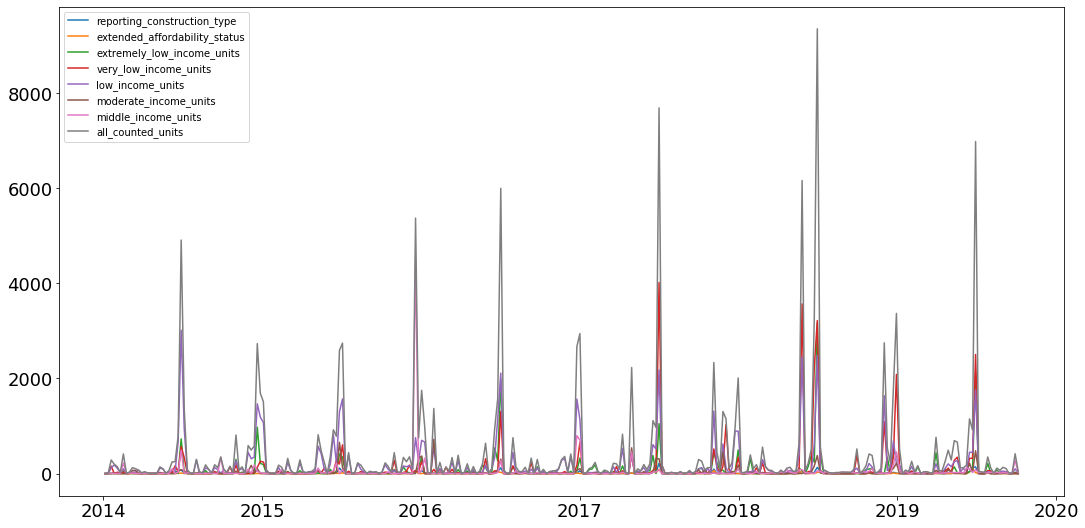

In [270]:
n = range(len(weekly_housing.columns[:-1]))
plot_series(weekly_housing , cols = weekly_housing.columns[n])

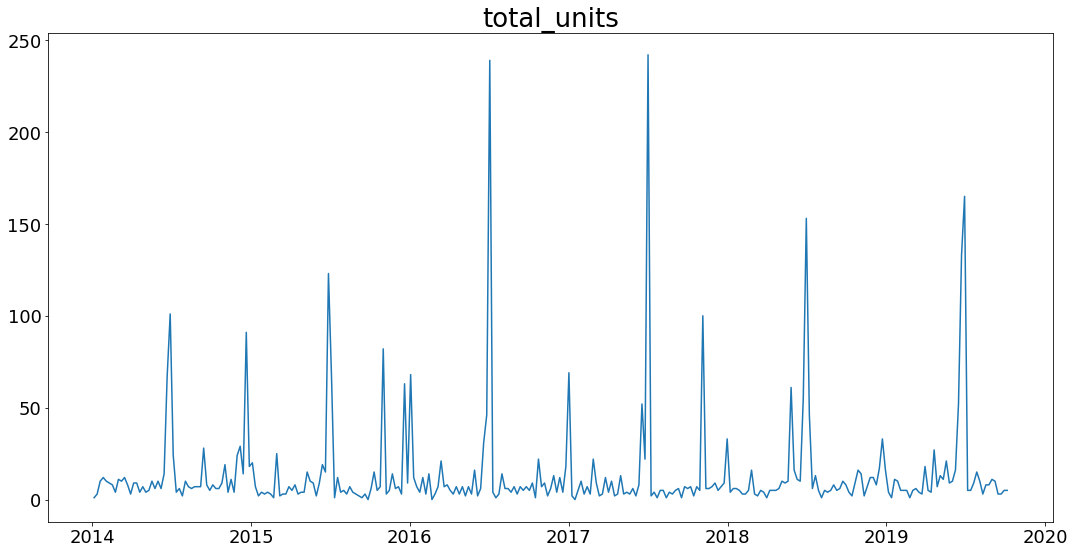

In [239]:
n = [8]
plot_series(weekly_housing , cols = weekly_housing.columns[n])

[0, 1, 2, 3, 4]

# Problem statement:
- I will use "Dept. of Homeless Servcies Daily Report" and other NYC data
- to build "time series regression model" that predicts the daily shelter population
- to help better prepare for homeless community needs and to understand homeless issue in New York city.

---

Your problem statement should the guiding principle for your project. You can think about this as a "SMART" goal.

- Specific:
        - What precisely do you plan to do?
        - What type of model will you need to develop?
- Measurable:
        - What metrics will you be using to assess performance?
        - MSE? Accuracy? Precision? AUC?
- Achievable:
        - Is your project appropriately scoped?
        - Is it too aggressive? Too easy?
        - Note: If your project is too big, break it up into smaller pieces. Sometimes a good project is the simply one part of a larger, longer-term agenda.
- Relevant:
        - Does anyone care about this?
        - Why should people be interested in your results?
        - What value will the completion of your project be adding?
- Time-bound
        - What's your deadline?